# EDA - telco costumers

In [1]:
import sys
from pathlib import Path
ROOT = Path().resolve().parent
src_path = str(ROOT / "src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [68]:
import importlib
import pandas as pd
from utils import load_data
import visualizations
importlib.reload(visualizations)
from visualizations import distribution_count, plot_churn_by_group
import clean_data
importlib.reload(clean_data)
from clean_data import fix_totalcharges
from clean_data import rename_columns


In [3]:
df = load_data()

In [4]:
df.describe(include="all")

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
df = rename_columns(df)

In [7]:
fix_totalcharges(df)
df.query("tenure==0")

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [8]:
df.loc[df.duplicated(subset="customer_id")]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


In [9]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

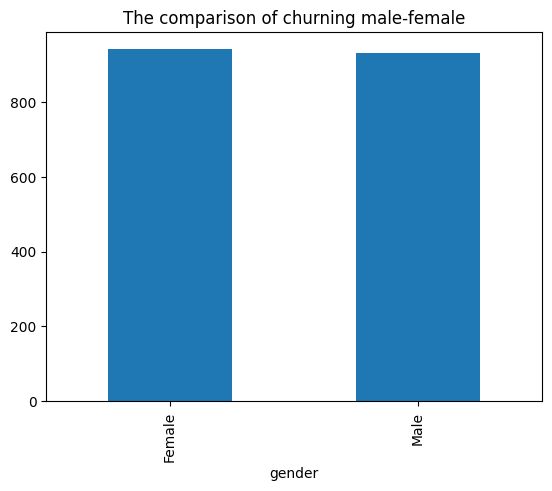

In [10]:
df_churn = df[df["churn"].str.lower()=="yes"]
ax = df_churn.groupby("gender")["churn"].count().sort_values(ascending=False) \
    .plot(kind="bar", title="The comparison of churning male-female")

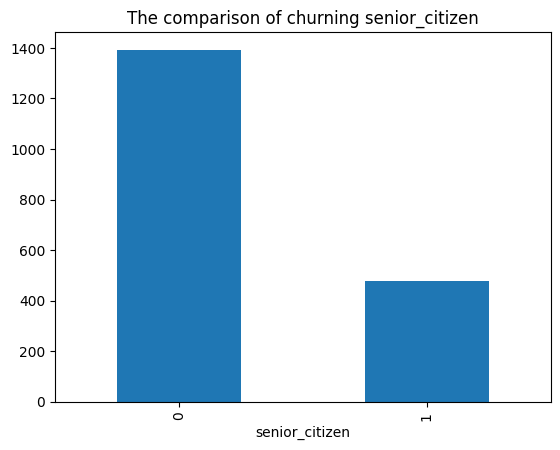

In [11]:
df_churn = df[df["churn"].str.lower()=="yes"]
ax = df_churn.groupby("senior_citizen")["churn"].count().sort_values(ascending=False) \
    .plot(kind="bar", title="The comparison of churning senior_citizen")

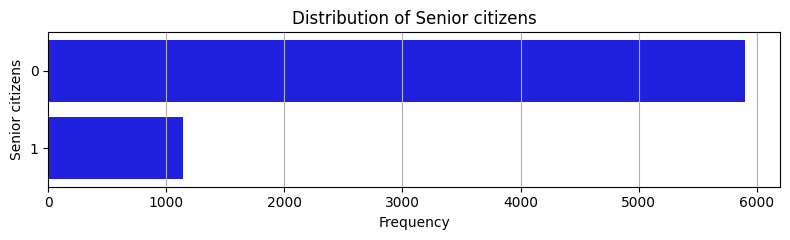

In [12]:
distribution_count(df["senior_citizen"], "Senior citizens")

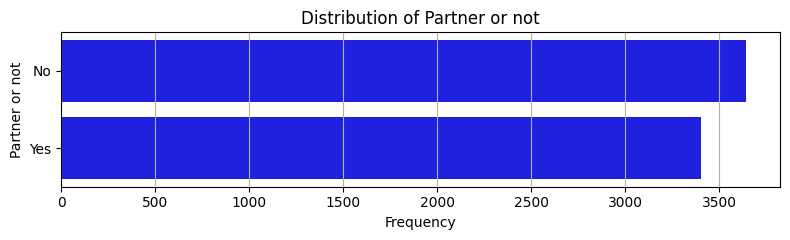

In [16]:
distribution_count(df["partner"], "Partner or not")

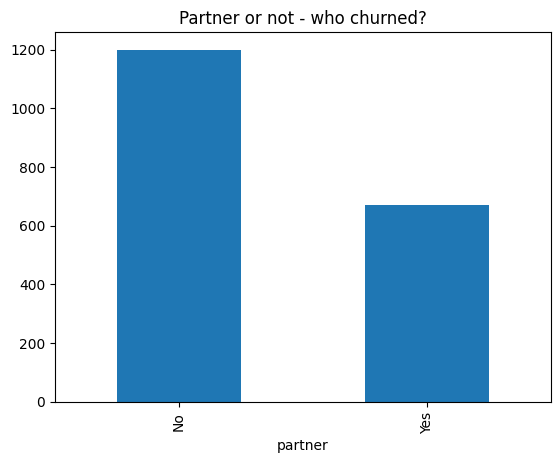

In [17]:
df_churn = df[df["churn"].str.lower()=="yes"]
ax = df_churn.groupby("partner")["churn"].count().sort_values(ascending=False) \
    .plot(kind="bar", title="Partner or not - who churned?")

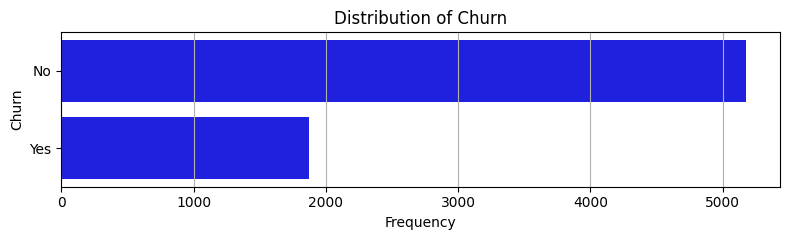

In [18]:
distribution_count(df["churn"], "Churn")

In [21]:
df_categorical = df.select_dtypes(include=["object"]).drop(columns=["churn"])
df_numerical = df.select_dtypes(include=["int64", "float64"])
from scipy.stats import chi2_contingency, ttest_ind


In [ ]:
print("Chi_2 - Categorical vs Churn")
for col in df_categorical.columns:
    contingency = pd.crosstab(df[col], df["churn"])
    chi_2, p, dof, _ = chi2_contingency(contingency)
    print(f"{col:<20} | p-value: {p:.50f} ---> {"RELEVANT" if p<0.05 else "NOT"}")

Chi_2 - Categorice vs Churn
customer_id          | p-value: 0.49439767459438704877427994688332546502351760864258 ---> NOT
gender               | p-value: 0.48657873605618595647115398605819791555404663085938 ---> NOT
partner              | p-value: 0.00000000000000000000000000000000000213991134407599 ---> RELEVANT
dependents           | p-value: 0.00000000000000000000000000000000000000000049249217 ---> RELEVANT
phone_service        | p-value: 0.33878253580669281941339932018308900296688079833984 ---> NOT
multiple_lines       | p-value: 0.00346438295487729985139280231010161514859646558762 ---> RELEVANT
internet_service     | p-value: 0.00000000000000000000000000000000000000000000000000 ---> RELEVANT
online_security      | p-value: 0.00000000000000000000000000000000000000000000000000 ---> RELEVANT
online_backup        | p-value: 0.00000000000000000000000000000000000000000000000000 ---> RELEVANT
device_protection    | p-value: 0.00000000000000000000000000000000000000000000000000 ---> RELEVA

In [37]:
for col in df_numerical.columns:
    yes = df[df['churn'] == 'Yes'][col]
    no  = df[df['churn'] == 'No'][col]

    t_stat, p = ttest_ind(yes, no, equal_var=False)

    print(f"{col:>20} | T-statistic: {t_stat:.3f} | p-value: {p:.50f}------>{"RELEVANT" if p<0.05 else "NOT"}")

      senior_citizen | T-statistic: 11.344 | p-value: 0.00000000000000000000000000003587587201830332450599------>RELEVANT
              tenure | T-statistic: -34.824 | p-value: 0.00000000000000000000000000000000000000000000000000------>RELEVANT
     monthly_charges | T-statistic: 18.408 | p-value: 0.00000000000000000000000000000000000000000000000000------>RELEVANT
       total_charges | T-statistic: -18.707 | p-value: 0.00000000000000000000000000000000000000000000000000------>RELEVANT


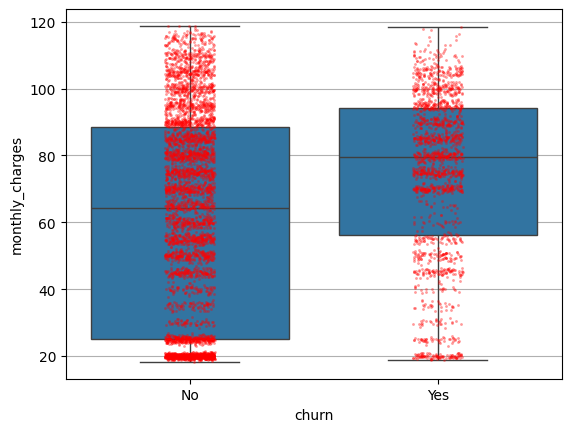

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="churn", y = "monthly_charges", data=df)
sns.stripplot(x="churn", y="monthly_charges", data=df, color="red", size=2, jitter=True, alpha=0.4)
plt.grid(True, axis="y")
plt.show()

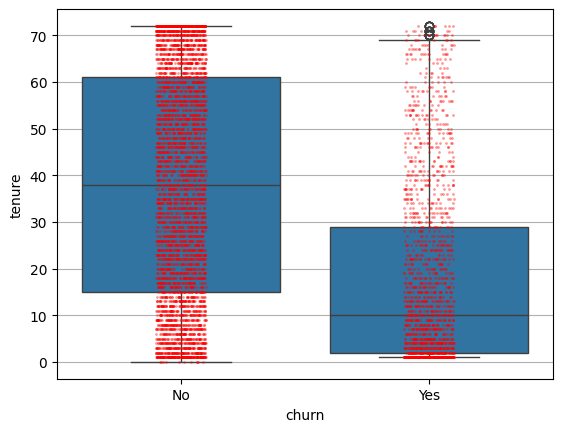

In [52]:
sns.boxplot(x="churn", y = "tenure", data=df)
sns.stripplot(x="churn", y="tenure", data=df, color="red", size=2, jitter=True, alpha=0.4)
plt.grid(True, axis="y")
plt.show()

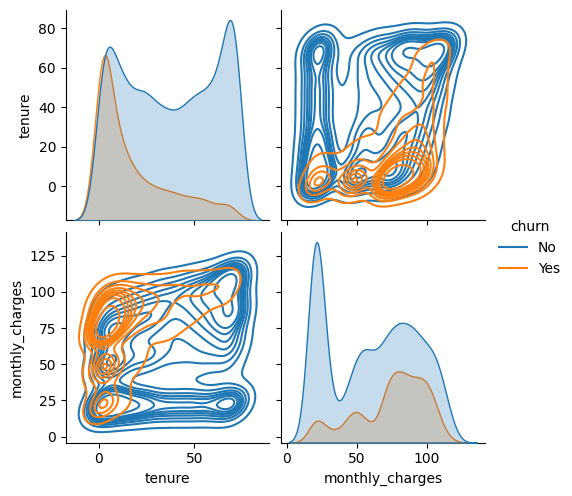

In [58]:
sns.pairplot(df, vars=["tenure", "monthly_charges"], hue = "churn", kind="kde")
plt.show()

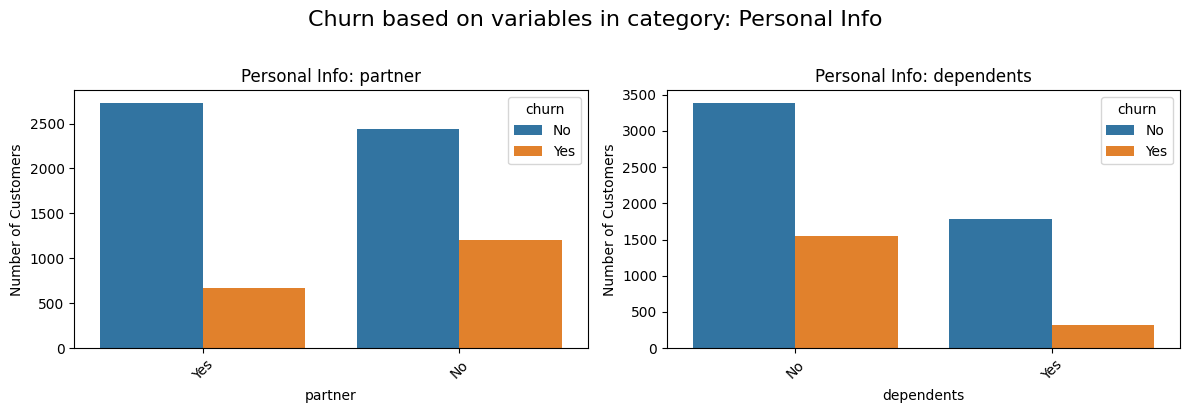

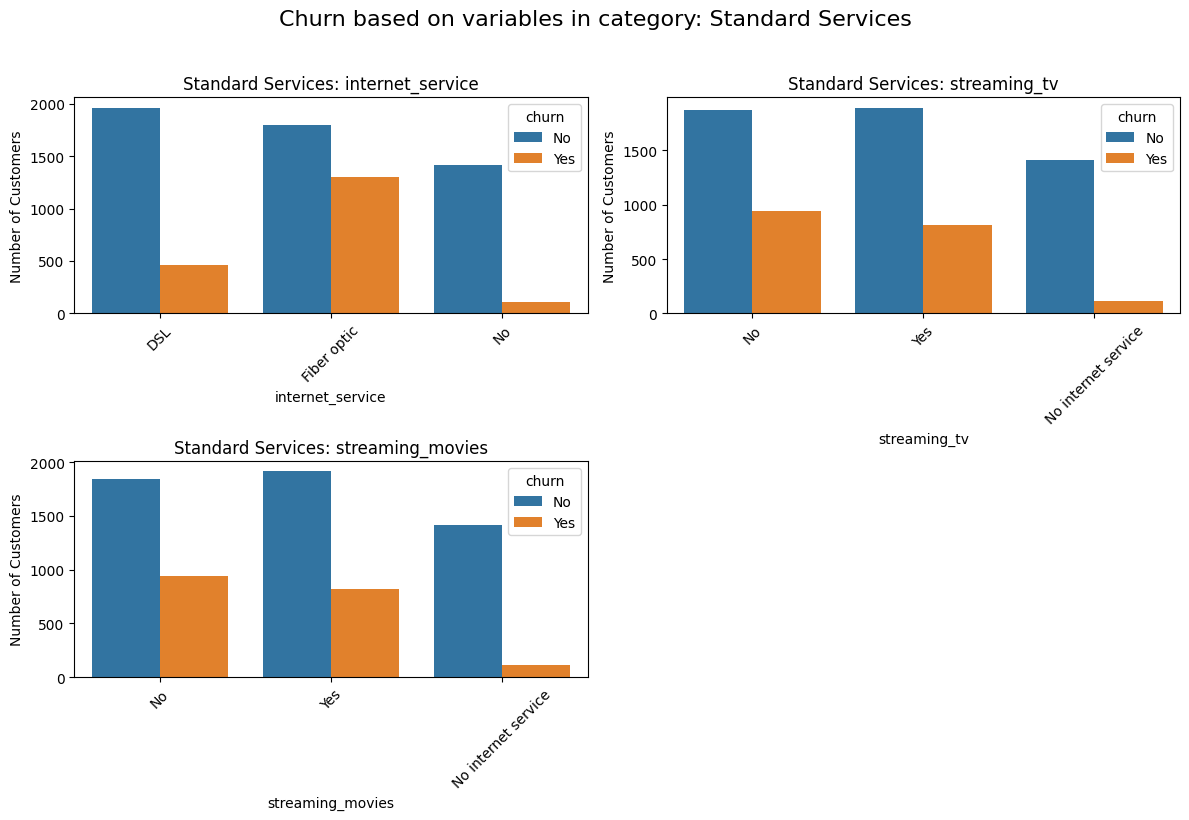

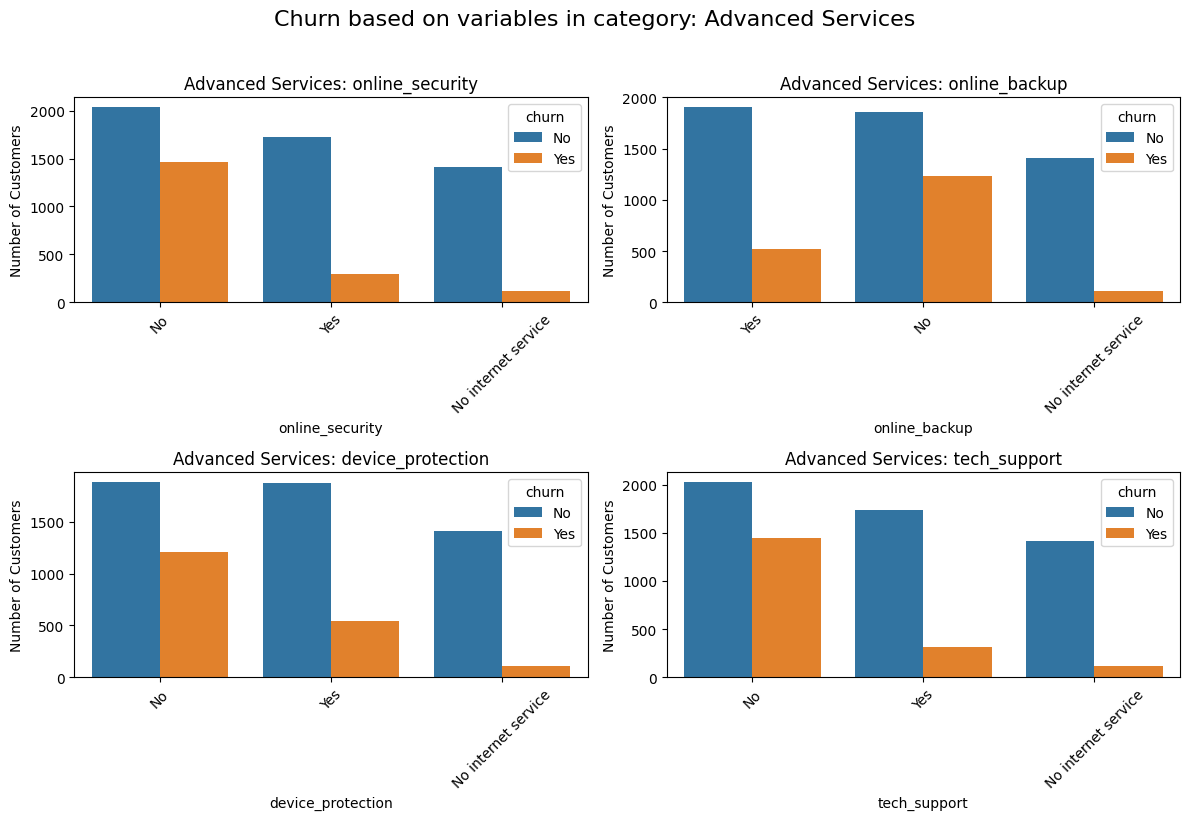

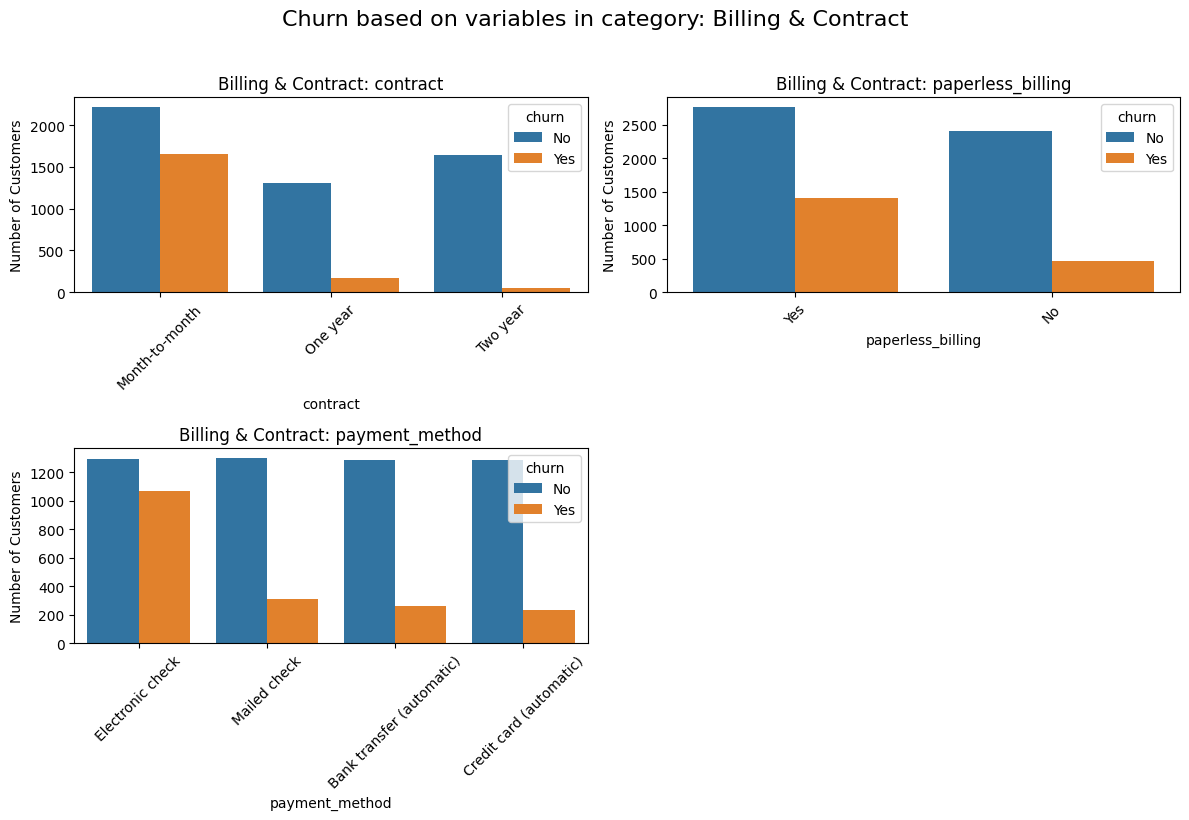

In [70]:

# Grouping variables into thematic categories
statistic_relevant_personal = ["partner", "dependents"]
statistic_relevant_regular_serv = ["internet_service", "streaming_tv", "streaming_movies"]
statistic_relevant_advanced_serv = ["online_security", "online_backup", "device_protection", "tech_support"]
statistic_relevant_billing = ["contract", "paperless_billing", "payment_method"]


# Apply plot_churn_by_group from visualizations to each variable group
plot_churn_by_group(statistic_relevant_personal, "Personal Info", df)
plot_churn_by_group(statistic_relevant_regular_serv, "Standard Services", df)
plot_churn_by_group(statistic_relevant_advanced_serv, "Advanced Services", df)
plot_churn_by_group(statistic_relevant_billing, "Billing & Contract", df)
